In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data_path = '/content/drive/MyDrive/CDC_python_chunyi/data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import os

# 資料分析
載入 LARS 資料

In [ ]:
df_lars_data = pd.read_csv(os.path.join(data_path, "LARS_flu.csv"))
df_lars_data = df_lars_data.dropna()
df_lars_data

,Year-Week of Specimen Received,Adenovirus,Parainfluenza,HSV,CMV,RSV,Influenza,SARS-CoV-2,HMPV,% Positive
0,202240,7.0,37.0,5.0,1.0,12.0,4.0,1.0,0.0,18.9
1,202241,1.0,50.0,2.0,3.0,15.0,6.0,5.0,0.0,30.4
2,202242,1.0,33.0,1.0,1.0,8.0,6.0,3.0,0.0,29.1
3,202243,2.0,73.0,29.0,0.0,18.0,5.0,4.0,0.0,21.2
4,202244,2.0,40.0,7.0,0.0,16.0,4.0,3.0,0.0,24.7
...,...,...,...,...,...,...,...,...,...,...
89,202425,21.0,1.0,8.0,0.0,0.0,35.0,15.0,0.0,27.2
90,202426,8.0,1.0,3.0,1.0,3.0,19.0,14.0,2.0,17.4
91,202427,9.0,4.0,1.0,0.0,4.0,25.0,7.0,0.0,30.1
92,202428,5.0,1.0,1.0,1.0,6.0,36.0,7.0,0.0,20.6


## 描述性分析

In [ ]:
# 建立描述性分析所需的資料
def fetch_data_basic_info(data:pd.DataFrame, colname:str) -> dict:
    basic_info = {
        'Mean' : data[colname].mean(),
        'StdDev' : data[colname].std(),
        'Min' : data[colname].min(),
        'Q1' : data[colname].quantile(0.25),
        'Median' : data[colname].median(),
        'Q3' : data[colname].quantile(0.75),
        'Max' : data[colname].max()
    }
    return basic_info

# 呈現結果
print(fetch_data_basic_info(data=df_lars_data, colname='Parainfluenza'))

{'Mean': 8.797872340425531, 'StdDev': 11.237016199098258, 'Min': 0.0, 'Q1': 2.0, 'Median': 5.5, 'Q3': 11.0, 'Max': 73.0}


In [ ]:
print(fetch_data_basic_info(data=df_lars_data, colname='Parainfluenza'))

{'Mean': 8.797872340425531, 'StdDev': 11.237016199098258, 'Min': 0.0, 'Q1': 2.0, 'Median': 5.5, 'Q3': 11.0, 'Max': 73.0}


## 樞紐分析表

In [ ]:
df_piv_lars_data = df_lars_data.melt(id_vars='Year-Week of Specimen Received')
df_piv_lars_data

,Year-Week of Specimen Received,variable,value
0,202240,Adenovirus,7.0
1,202241,Adenovirus,1.0
2,202242,Adenovirus,1.0
3,202243,Adenovirus,2.0
4,202244,Adenovirus,2.0
...,...,...,...
841,202425,% Positive,27.2
842,202426,% Positive,17.4
843,202427,% Positive,30.1
844,202428,% Positive,20.6


In [ ]:
piv_lars = pd.pivot_table(
    data = df_piv_lars_data,
    index = 'Year-Week of Specimen Received',
    columns = 'variable',
    aggfunc = 'mean'
)
piv_lars

value                             \
variable                       % Positive Adenovirus  CMV HMPV   HSV   
Year-Week of Specimen Received                                         
202240                               18.9        7.0  1.0  0.0   5.0   
202241                               30.4        1.0  3.0  0.0   2.0   
202242                               29.1        1.0  1.0  0.0   1.0   
202243                               21.2        2.0  0.0  0.0  29.0   
202244                               24.7        2.0  0.0  0.0   7.0   
...                                   ...        ...  ...  ...   ...   
202425                               27.2       21.0  0.0  0.0   8.0   
202426                               17.4        8.0  1.0  2.0   3.0   
202427                               30.1        9.0  0.0  0.0   1.0   
202428                               20.6        5.0  1.0  0.0   1.0   
202429                               20.8        2.0  0.0  0.0   2.0   

                                                                         
variable                       Influenza Parainfluenza   RSV SARS-CoV-2  
Year-Week of Specimen Received                                           
202240                               4.0          37.0  12.0        1.0  
202241                               6.0          50.0  15.0        5.0  
202242                               6.0          33.0   8.0        3.0  
202243                               5.0          73.0  18.0        4.0  
202244                               4.0          40.0  16.0        3.0  
...                                  ...           ...   ...        ...  
202425                              35.0           1.0   0.0       15.0  
202426                              19.0           1.0   3.0       14.0  
202427                              25.0           4.0   4.0        7.0  
202428                              36.0           1.0   6.0        7.0  
202429                              16.0           2.0   0.0        8.0  

[94 rows x 9 columns]

# 資料視覺化

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_lars_data.iloc[:,1:].corr()

,Adenovirus,Parainfluenza,HSV,CMV,RSV,Influenza,SARS-CoV-2,HMPV,% Positive
Adenovirus,1.000000,-0.088167,0.104853,-0.154646,0.174293,0.388071,0.106824,-0.059496,0.649931
Parainfluenza,-0.088167,1.000000,0.381543,0.135992,0.517390,-0.166035,-0.071518,-0.213610,0.032269
HSV,0.104853,0.381543,1.000000,-0.051896,0.172058,-0.029989,0.132147,0.132432,-0.216559
CMV,-0.154646,0.135992,-0.051896,1.000000,0.064471,-0.041507,0.030625,0.075669,-0.153021
RSV,0.174293,0.517390,0.172058,0.064471,1.000000,0.333419,-0.144682,-0.271809,0.272786
Influenza,0.388071,-0.166035,-0.029989,-0.041507,0.333419,1.000000,0.266663,0.048753,0.465469
SARS-CoV-2,0.106824,-0.071518,0.132147,0.030625,-0.144682,0.266663,1.000000,0.352540,-0.015467
HMPV,-0.059496,-0.213610,0.132432,0.075669,-0.271809,0.048753,0.352540,1.000000,-0.192017
% Positive,0.649931,0.032269,-0.216559,-0.153021,0.272786,0.465469,-0.015467,-0.192017,1.000000


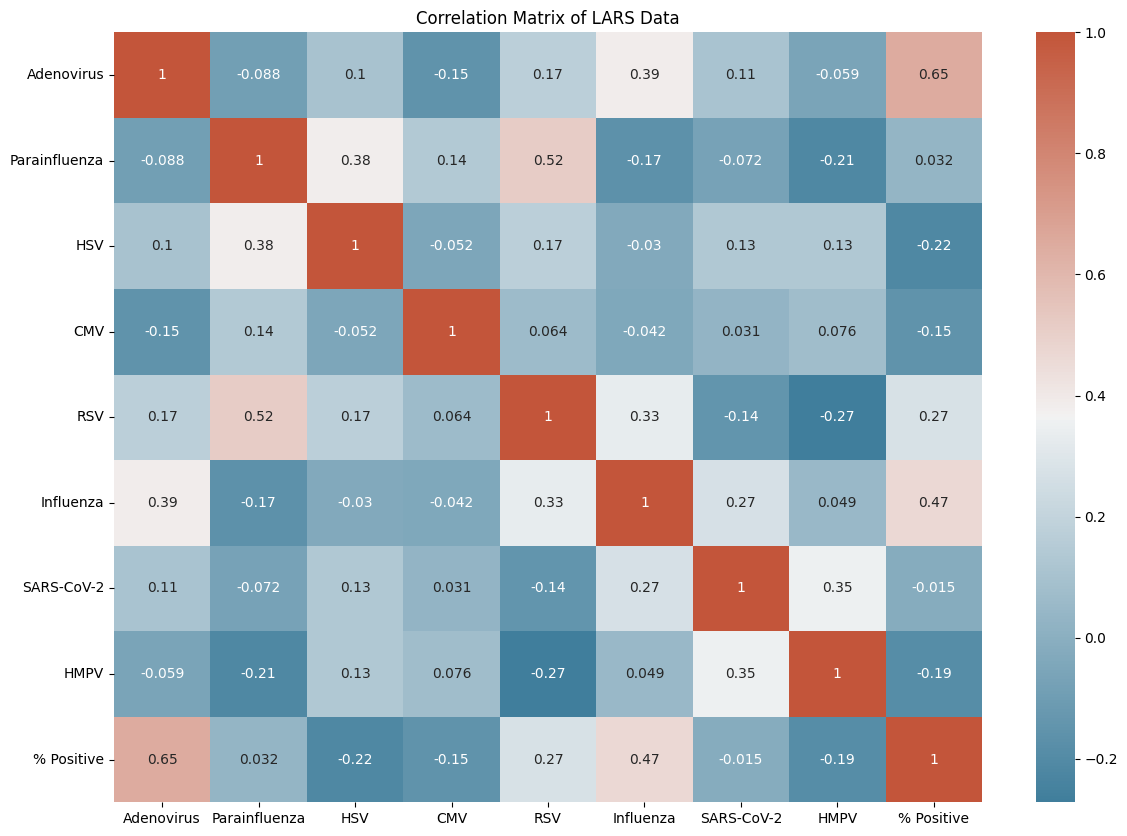

In [ ]:
plt.figure(figsize=(14, 10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df_lars_data.iloc[:,1:].corr(), annot=True, cmap=cmap)
plt.title('Correlation Matrix of LARS Data')
plt.show()


In [ ]:
df_lars_data

,Year-Week of Specimen Received,Adenovirus,Parainfluenza,HSV,CMV,RSV,Influenza,SARS-CoV-2,HMPV,% Positive
0,202240,7.0,37.0,5.0,1.0,12.0,4.0,1.0,0.0,18.9
1,202241,1.0,50.0,2.0,3.0,15.0,6.0,5.0,0.0,30.4
2,202242,1.0,33.0,1.0,1.0,8.0,6.0,3.0,0.0,29.1
3,202243,2.0,73.0,29.0,0.0,18.0,5.0,4.0,0.0,21.2
4,202244,2.0,40.0,7.0,0.0,16.0,4.0,3.0,0.0,24.7
...,...,...,...,...,...,...,...,...,...,...
89,202425,21.0,1.0,8.0,0.0,0.0,35.0,15.0,0.0,27.2
90,202426,8.0,1.0,3.0,1.0,3.0,19.0,14.0,2.0,17.4
91,202427,9.0,4.0,1.0,0.0,4.0,25.0,7.0,0.0,30.1
92,202428,5.0,1.0,1.0,1.0,6.0,36.0,7.0,0.0,20.6


<Figure size 1600x900 with 0 Axes>

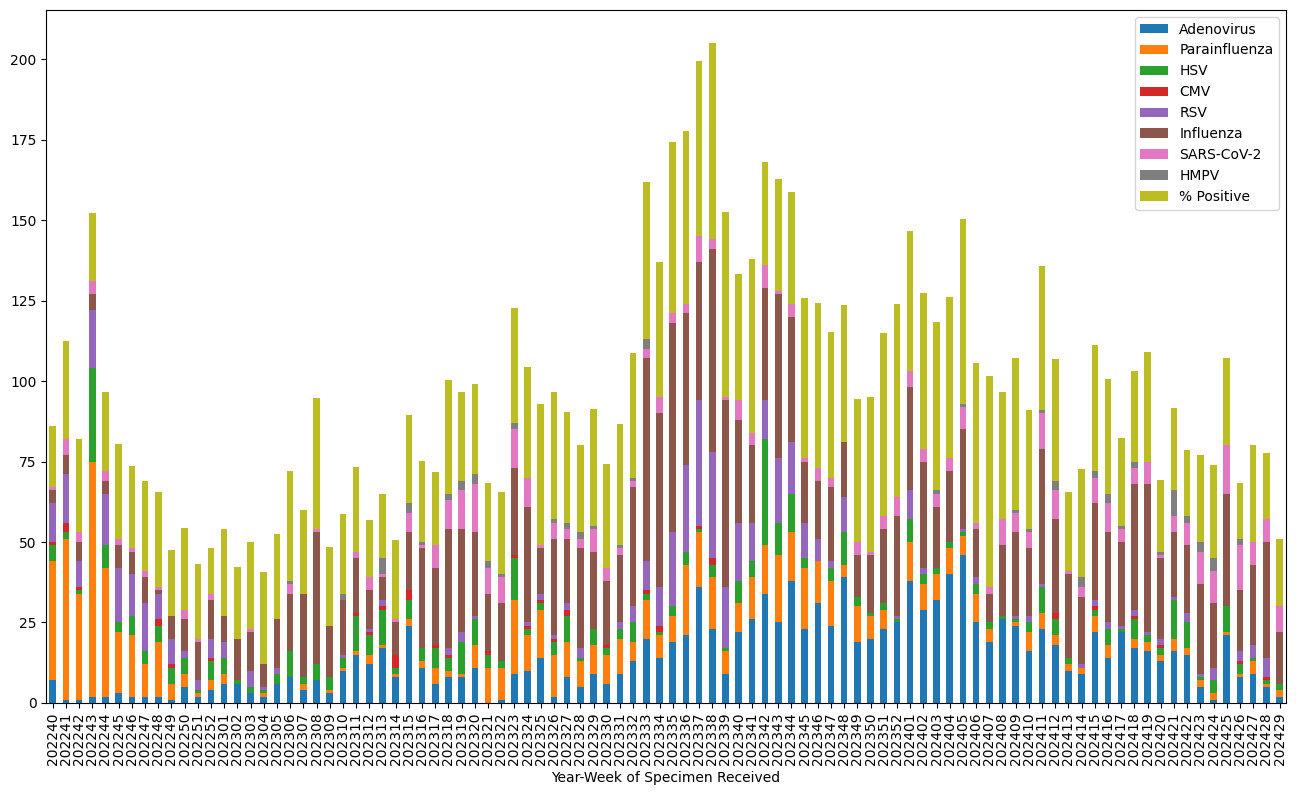

In [24]:
# 繪製堆疊長條圖
plt.figure(figsize=(16, 9))
df_lars_data.set_index('Year-Week of Specimen Received').plot(kind='bar', stacked=True, figsize=(16, 9))
plt.show()